---

# Linear Regression

## Regression
Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

## Linear Regression
Many types of problems and data fall into this roughly linear relationship. For example, one could reasonably suspect that such a relationship exists when considering the iris dataset setosa species sepal length as feature measurements together with the iris dataset setosa species sepal width as targets. This can be verified by visualizing the data. 

---

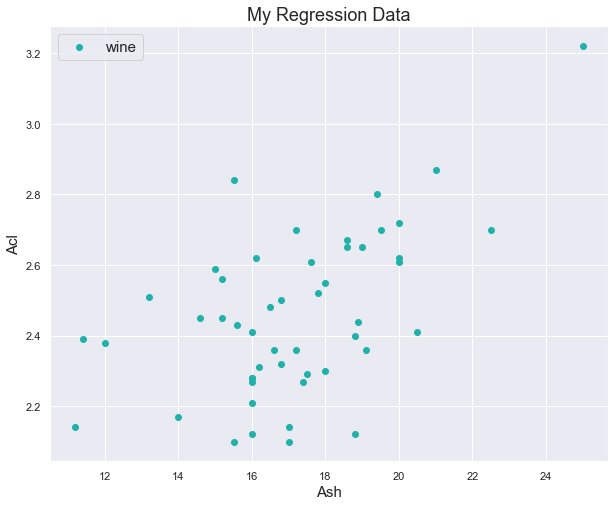

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

from sklearn import datasets

df = pd.read_csv("/Users/mingzeyuan/Desktop/Rice/22 Spring/INDE577/Final/Data/wine.csv")
df = df.iloc[:50][["Acl", "Ash"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.Acl, 
            df.Ash, 
            color = "lightseagreen",
            label = "wine")
plt.xlabel("Ash", fontsize = 15)
plt.ylabel("Acl", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()


---
Because we are assuming the target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is a **linear function of the input features**, and because we know single neuron models are good function approximators, we next build a single neuron model with a *linear-activation* activation function. Furthermore, in this model we choose the *mean-sqaured error* cost function:

$$
C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

With our specific case of linear regression on the wine dataset with a single feature measurment taken from Ash data, we next construct a single neuron model with a linear activation function and the mean-sqaured error cost function.

Before defining a custom ```SingleNeuron``` class, we first need first discuss how to minimize the neurons cost function. More specifically, we wish to solve the following optimization problem:

$$
\min_{w_1, b}C(w_1, b)
$$

Since $C(w_1, b)$ is a differentiable function of both $w_1$ and $b$, we may attempt to solve this minimization problem by applying the gradient descent algorithm:

$$
w_1 \leftarrow w_1 - \alpha \frac{\partial C}{\partial w_1}
$$

$$
b \leftarrow b - \alpha \frac{\partial C}{\partial b}
$$

In order to implement the gradient descent method we first need to understand how the partial derivatives of $C(w_1, b)$ are calculated over the training data at hand. With this in mind, suppose for now that we are calculating the mean-sqaured error cost function on a *single example* example of data, i.e., $N = 1$. For this single example we observe that the mean-sqaured error cost function becomes: 

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

In the case of a linear activation function, it is important to note that $\hat{y}^{(i)}$ is a very simple function of both $w_1$ and $b$. More specifically, we observe:

$$
\hat{y}^{(i)} = a = z = w_1x^{(i)} + b. 
$$

Thus, we may rewrite our neuron cost function with a single observation:

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(w_1x^{(i)} + b - y^{(i)}\Big)^2. 
$$

---

In [2]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


In [3]:
X = df.Ash.values
X = X.reshape(-1, 1)
y = df.Acl.values

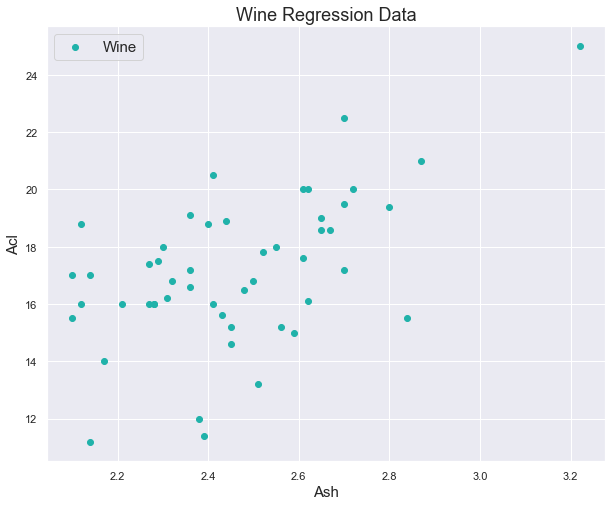

In [4]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Wine")
plt.xlabel("Ash", fontsize = 15)
plt.ylabel("Acl", fontsize = 15)
plt.title("Wine Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

In [8]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.01, epochs = 5)

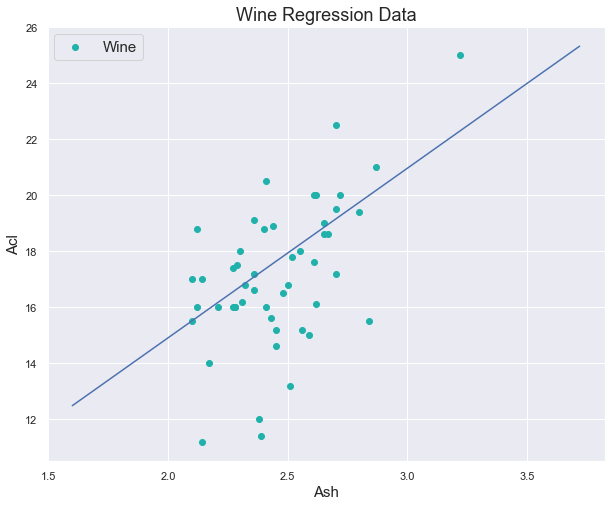

In [9]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Wine")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Ash", fontsize = 15)
plt.ylabel("Acl", fontsize = 15)
plt.title("Wine Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

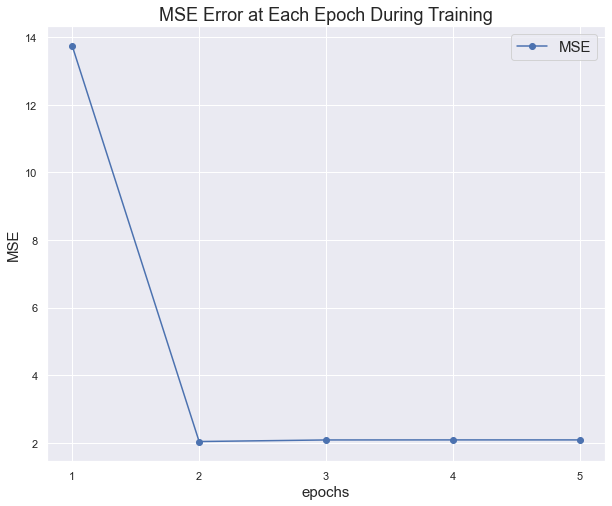

In [10]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

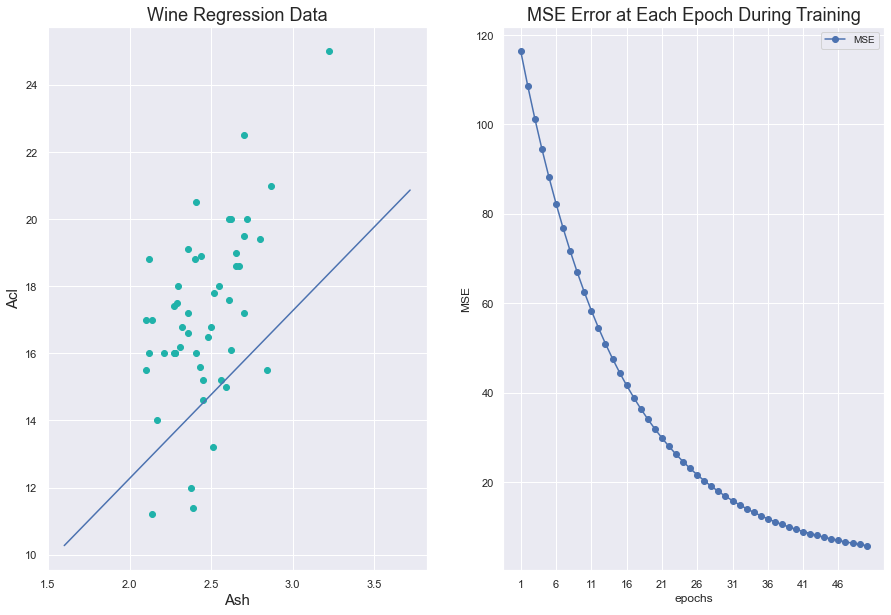

In [11]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Ash", fontsize = 15)
ax1.set_ylabel("Acl", fontsize = 15)
ax1.set_title("Wine Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)


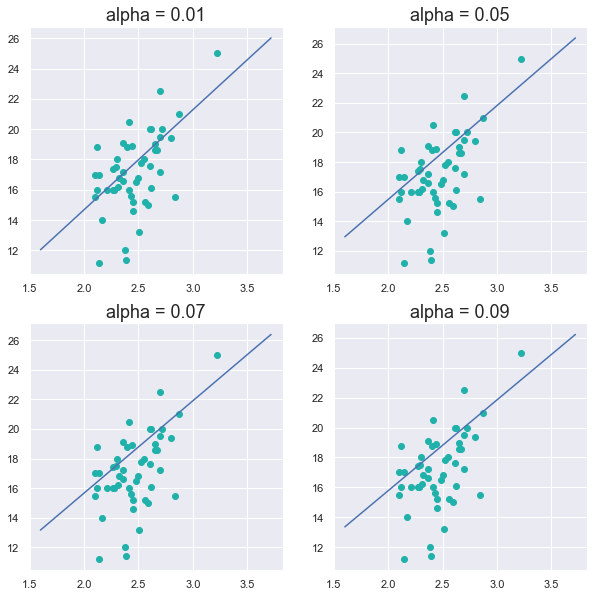

In [12]:
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

fig, axs = plt.subplots(2, 2, figsize=(10,10))

for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)